In [1]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
%matplotlib inline

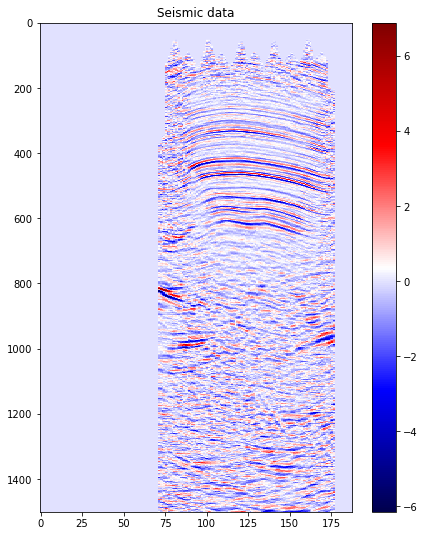

In [2]:
segyfile = r'filt_mig.sgy' #on the g-drive it's only ~300 mb

f = segyio.open(segyfile, iline=segyio.tracefield.TraceField.EnergySourcePoint, 
                xline=segyio.tracefield.TraceField.TraceNumber)
#the xline and inline numbers were grabbed from the loading info word document xl is bytes 13-16 and il is bytes 17-20

il, xl, t = f.ilines, f.xlines, f.samples
dt = t[1] - t[0]

d = segyio.cube(f) #this makes the numpy cube
nil, nxl, nt = d.shape #number of inlines, cross lines and time 

plt.figure(figsize=(7, 9))
plt.imshow(d[nil//2].T, cmap='seismic') #the floor division selects the inline or crossline number
plt.title('Seismic data')
plt.colorbar()
plt.axis('tight');

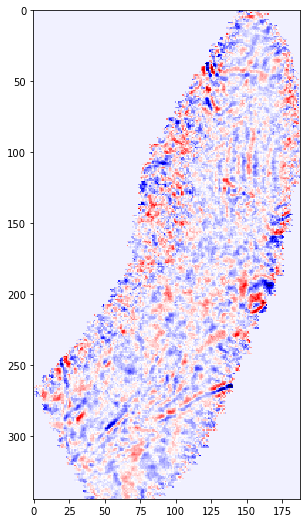

In [4]:
plt.figure(figsize=(7, 9))
plt.imshow(d[:, :, nt//2], cmap='seismic') #timeslice